In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("heart.csv")

In [9]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [10]:
df.columns = new_columns

In [11]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak"]
categoric_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [17]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


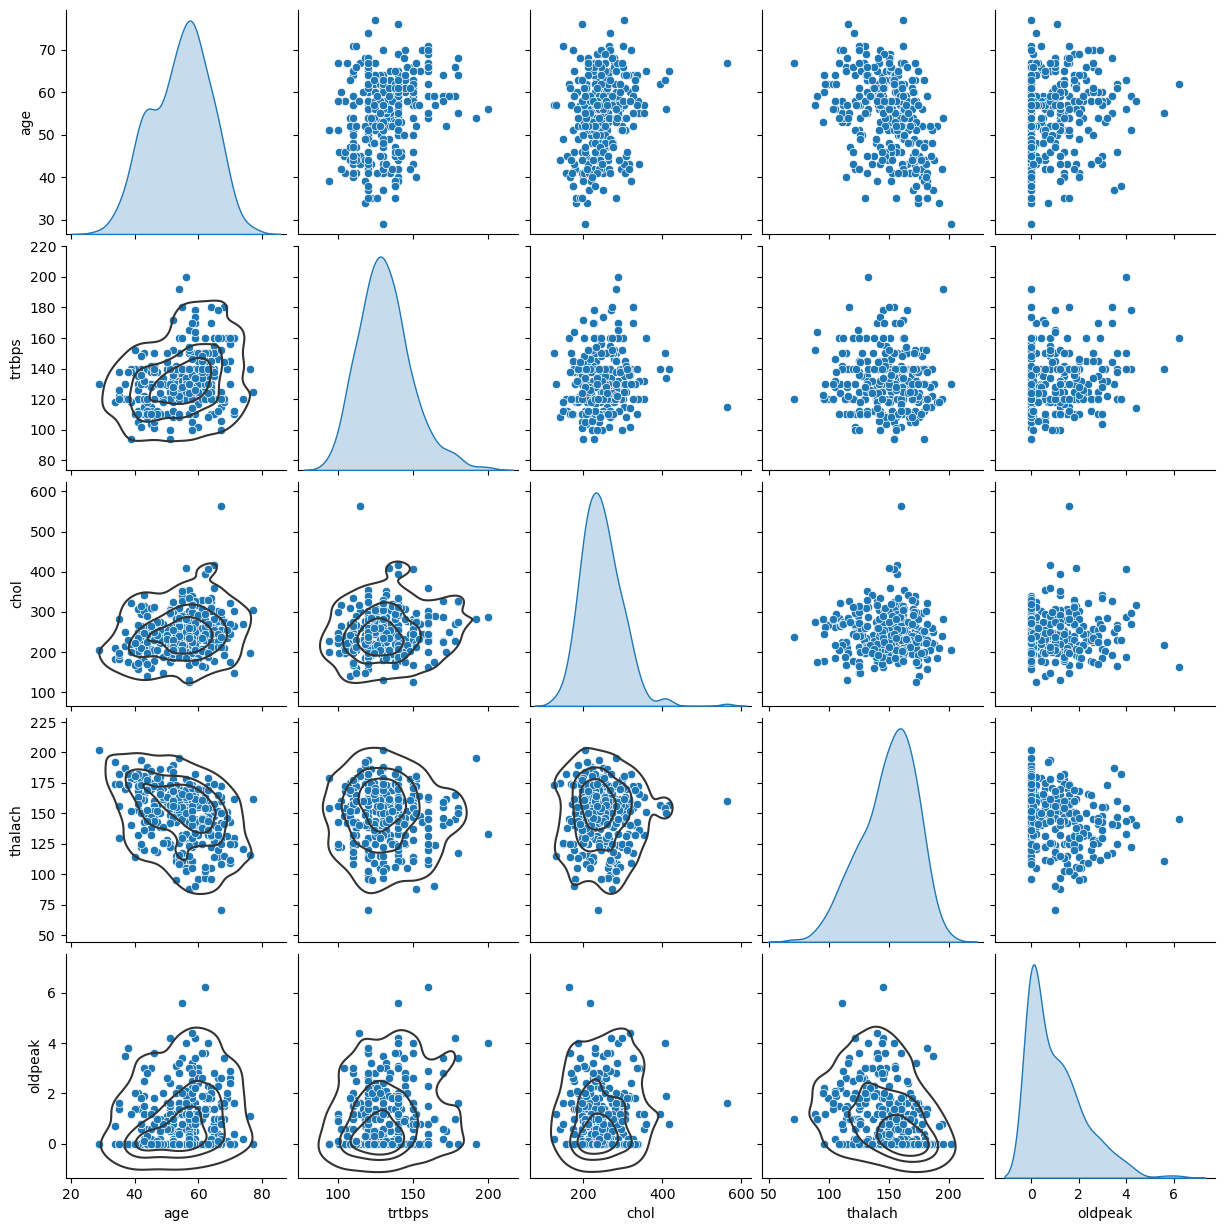

In [19]:
graph = sns.pairplot(df[numeric_var],diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels=4, color = ".2")
plt.show()

#### Feature Scaling

Scaling = Verilerdeki ölçek farklarını ortadan kaldırır (örneğin, biri 0-1, diğeri 0-1000 aralığında olan değişkenleri eşitler).
Özellikle ölçeğe duyarlı algoritmalar (örneğin, doğrusal regresyon, SVM) için daha iyi sonuçlar sağlar.

In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
robust_scaler = RobustScaler()

In [24]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [25]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [26]:
type(scaled_data)

numpy.ndarray

In [27]:
df_scaled = pd.DataFrame(scaled_data,columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [28]:
df_new = pd.concat([df_scaled,df.loc[:,"target"]],axis = 1)

In [29]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


#### Melt Function
pd.melt() fonksiyonu, geniş (wide) formattaki bir DataFrame’i uzun (long) formata dönüştürür. Bu işlem, özellikle görselleştirme veya analiz öncesi veriyi sadeleştirmek için kullanılır.

In [31]:
melted_data  = pd.melt(df_new, id_vars = "target" , var_name = "variables" , value_name = "value")

In [32]:
melted_data

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


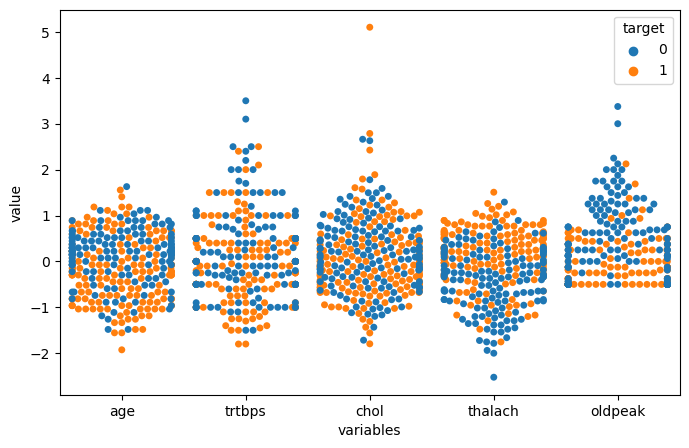

In [33]:
plt.figure(figsize = (8,5))
sns.swarmplot(x="variables",y="value", hue = "target",data = melted_data)
plt.show()

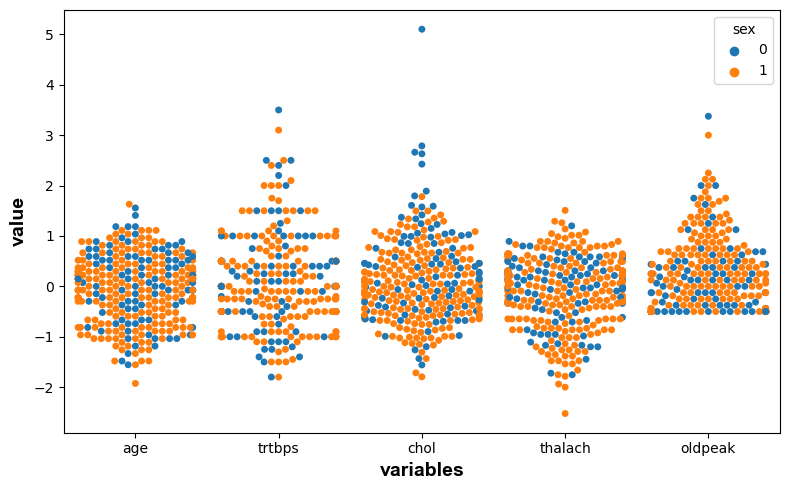

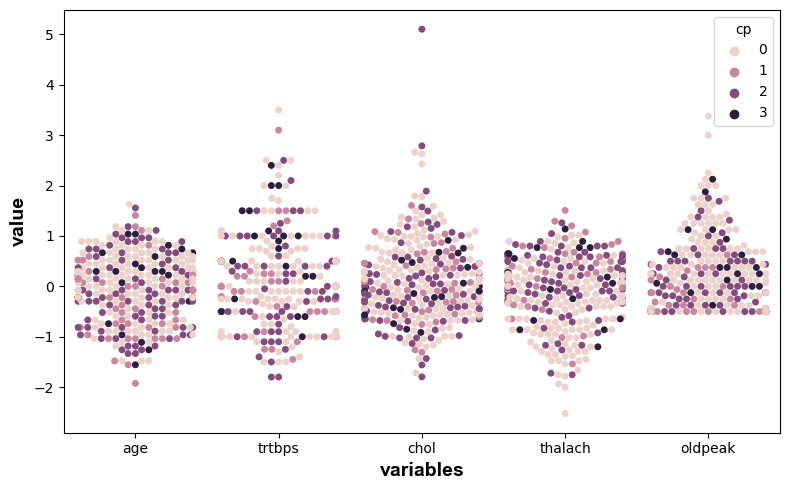

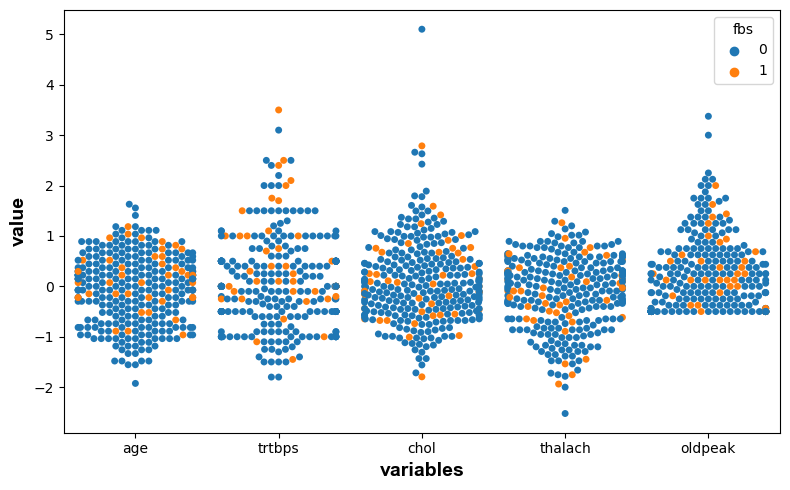

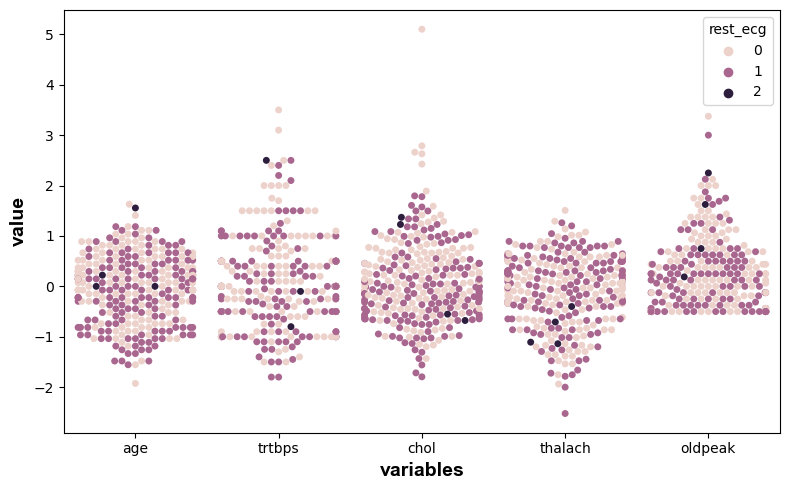

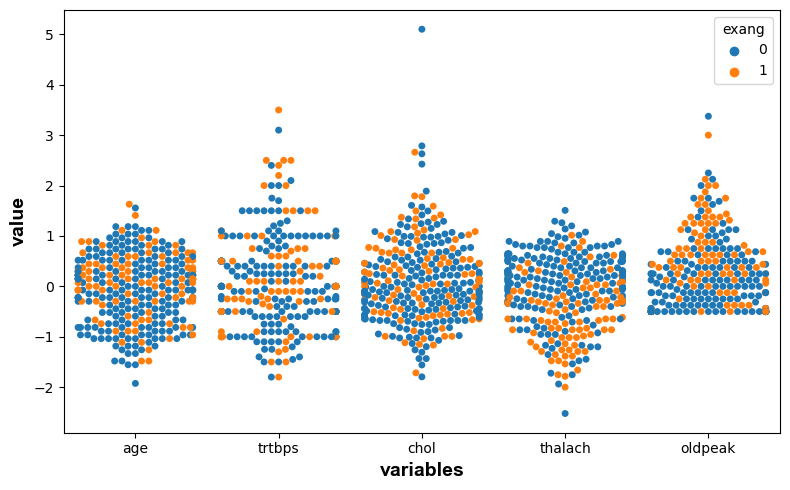

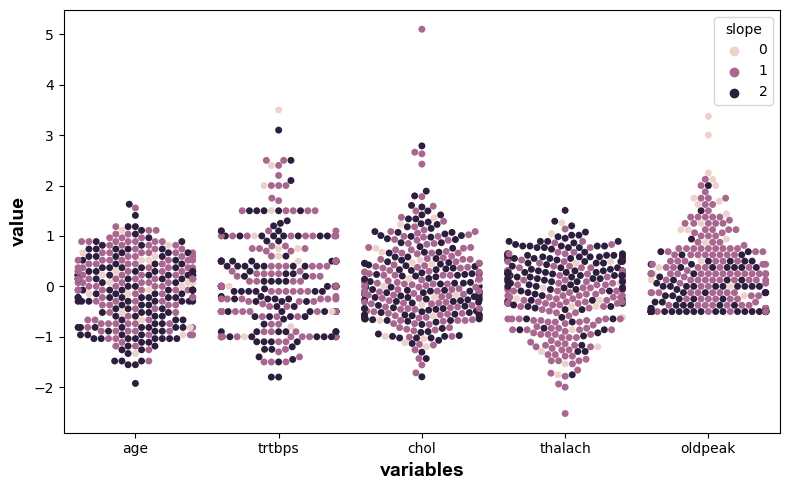

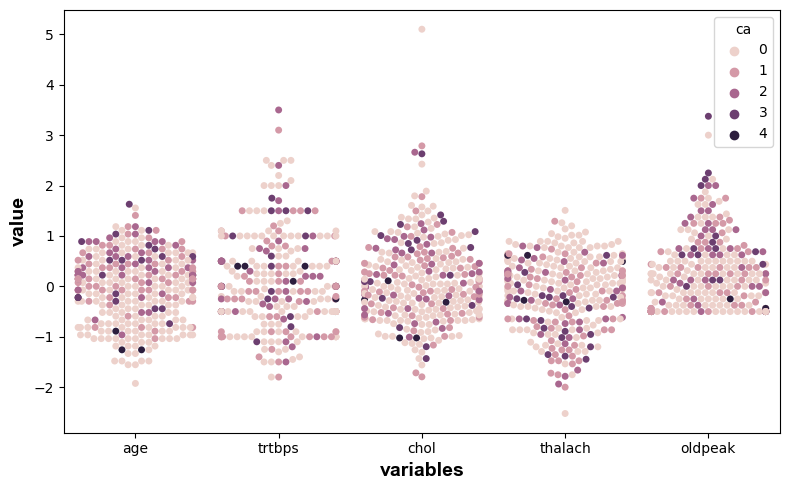

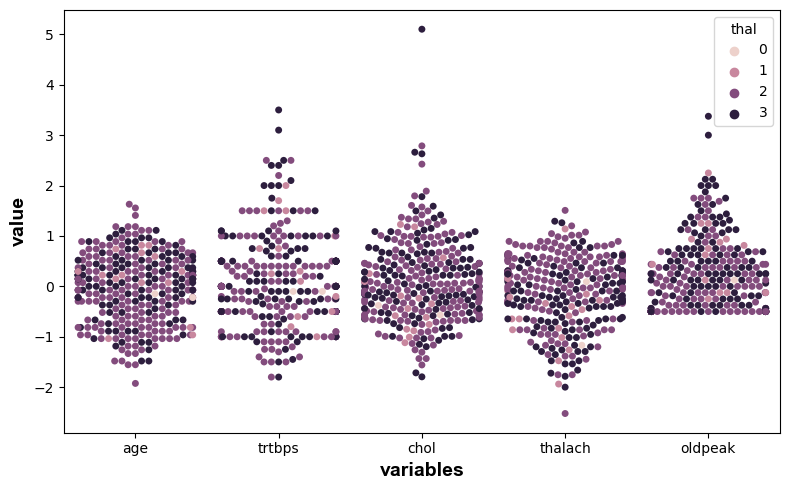

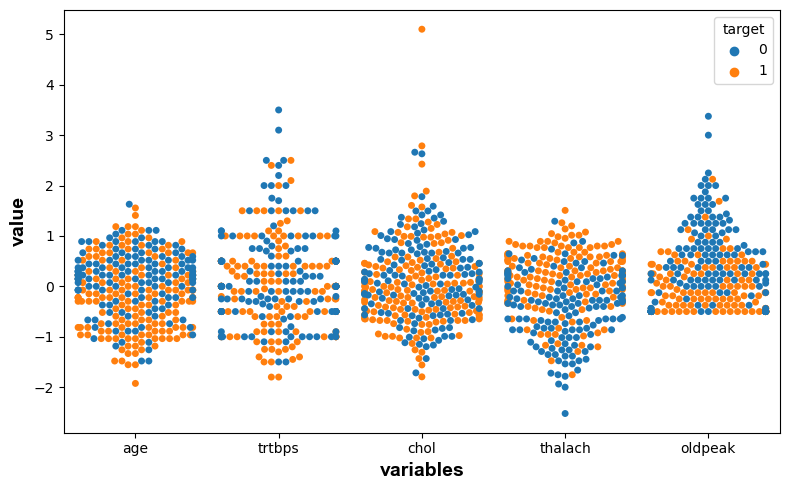

In [40]:
axis_font = {"family": "arial", "color": "black", "weight": "bold", "size": 14}

for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis=1)
    melted_data = pd.melt(df_new, id_vars=i, var_name="variables", value_name="value")

    plt.figure(figsize=(8, 5))
    sns.swarmplot(x="variables", y="value", hue=i, data=melted_data)

    plt.xlabel("variables", fontdict=axis_font)
    plt.ylabel("value", fontdict=axis_font)

    plt.tight_layout()
    plt.show()


#### Analysis with Box Plot

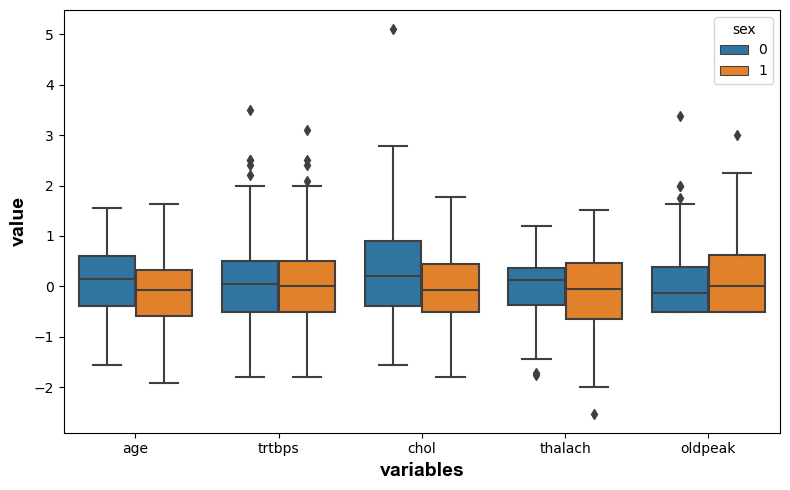

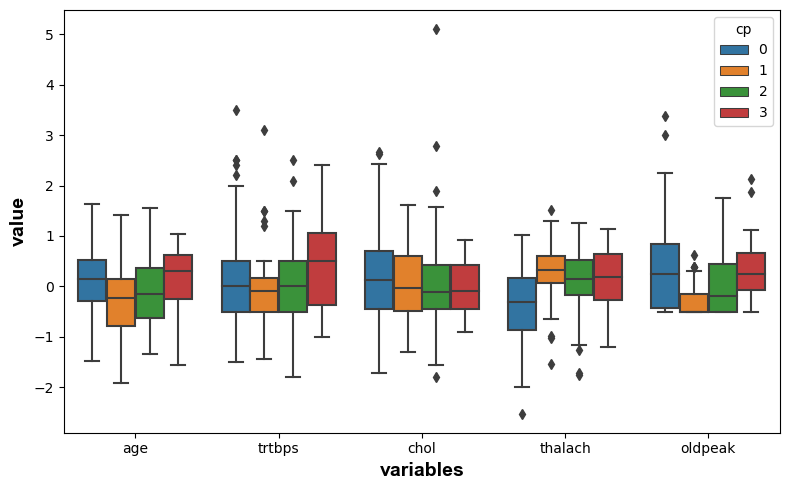

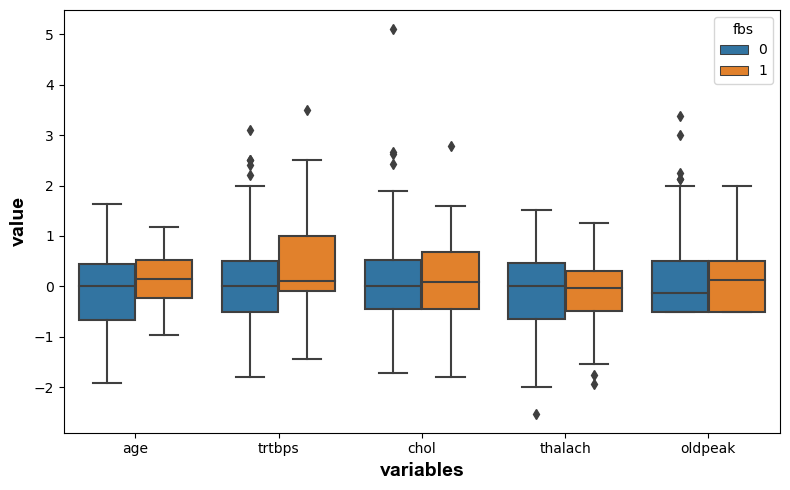

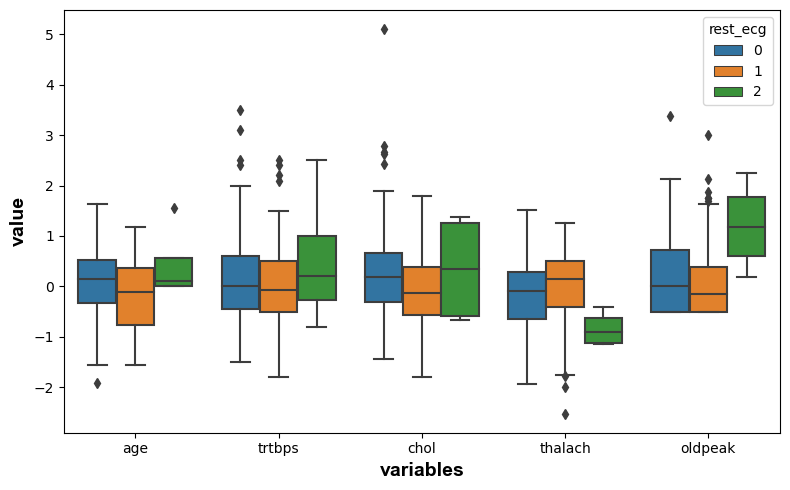

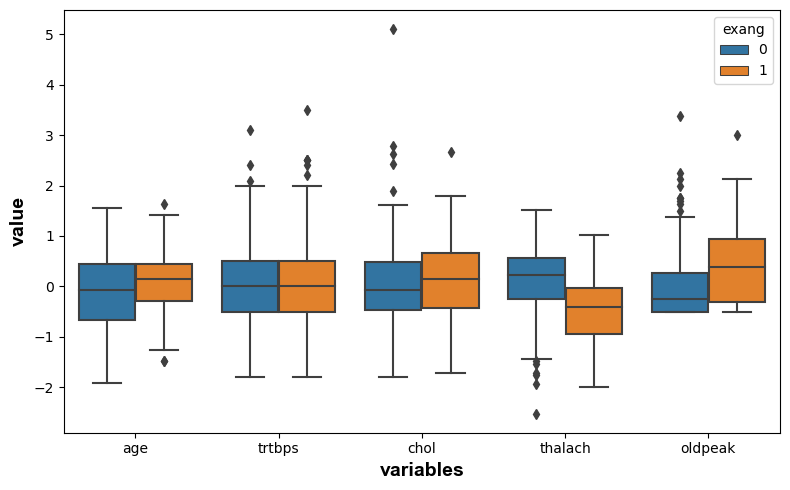

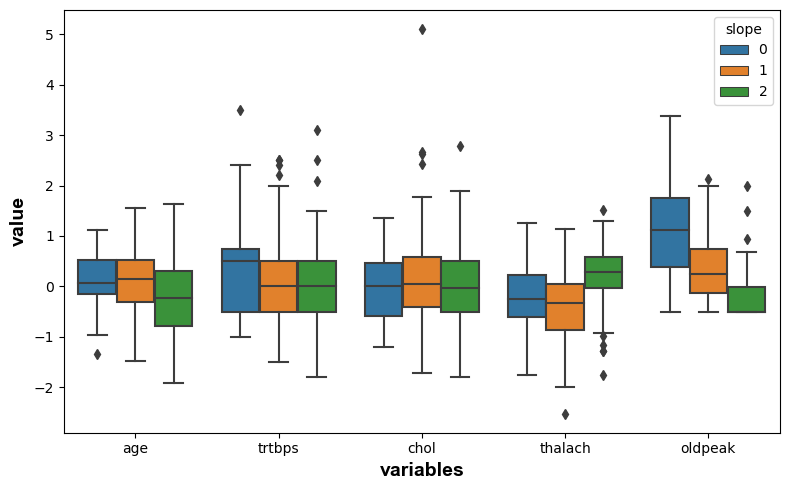

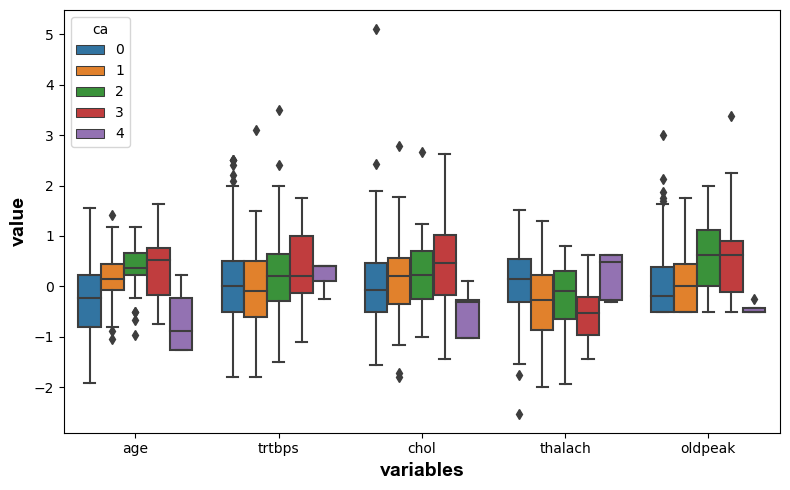

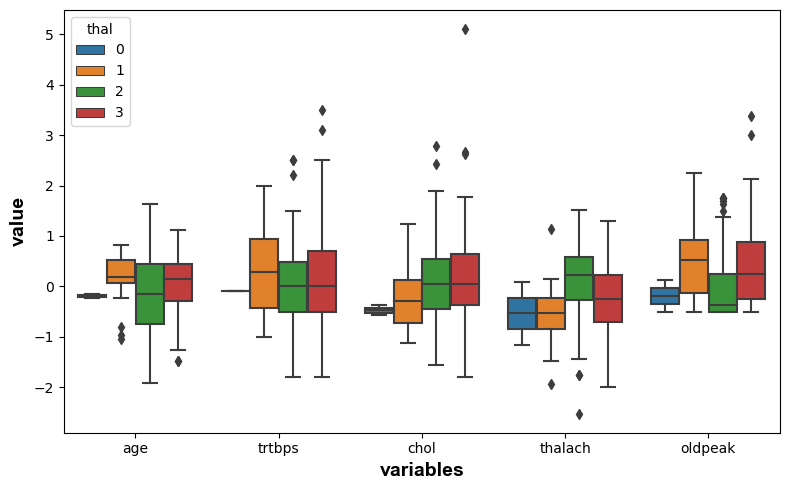

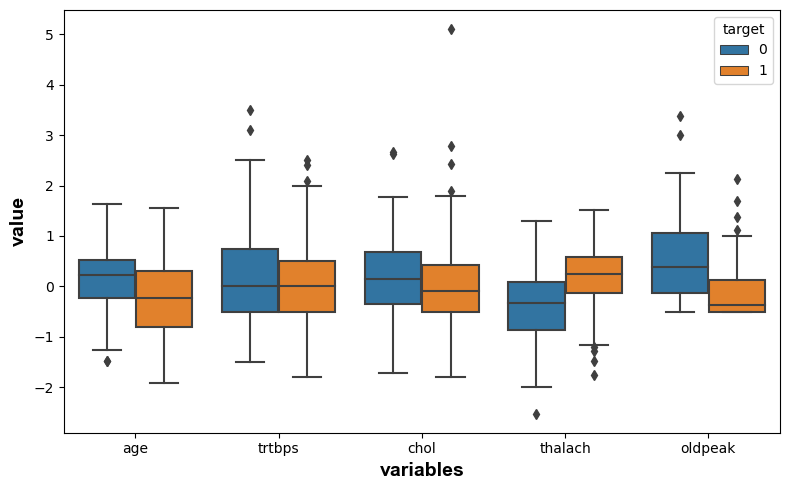

In [43]:
axis_font = {"family": "arial", "color": "black", "weight": "bold", "size": 14}

for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis=1)
    melted_data = pd.melt(df_new, id_vars=i, var_name="variables", value_name="value")

    plt.figure(figsize=(8, 5))
    sns.boxplot(x="variables", y="value", hue=i, data=melted_data)

    plt.xlabel("variables", fontdict=axis_font)
    plt.ylabel("value", fontdict=axis_font)

    plt.tight_layout()
    plt.show()


In [47]:
# Box plotta aralarindaki iliskiyi anlamak icin ortadaki median cizgilerine bakariz birbirlerinin hizasinda mi birbirinden farkli mi diye 
#yuksek korelasyon olmasi icin kutucuklarin birbirine yakin deger de degil uzak olmasi lazim yukaridaki tabloda low corelation soz konusu

#### Heat Map

Box plot = Tercih edilir:Kategorik değişkenlere göre sayısal dağılımları karşılaştırmak Aykırı değer analizi

Swarm Plot = Tercih edilir: Gözlem sayısı çok yüksek değilse (genellikle birkaç yüz nokta ve altı) Ayrıntılı nokta analizine ihtiyaç duyulduğunda
Box plot’la kombinasyon yapıp (örn. violinplot + swarmplot) dağılımı hem özet hem de nokta bazında göstermek istediğinizde

Heatmap = Tercih edilir: Değişkenler arası korelasyon analizi
Çapraz tablolar (pivot) ile ısı dağılımı incelemek

In [50]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [52]:
df_new2 = pd.concat([df_scaled , df[categoric_var]], axis = 1)

In [54]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [60]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.068001,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.098803,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.096439,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210244,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.161736,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.011981,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.206754,-0.436757


<Axes: >

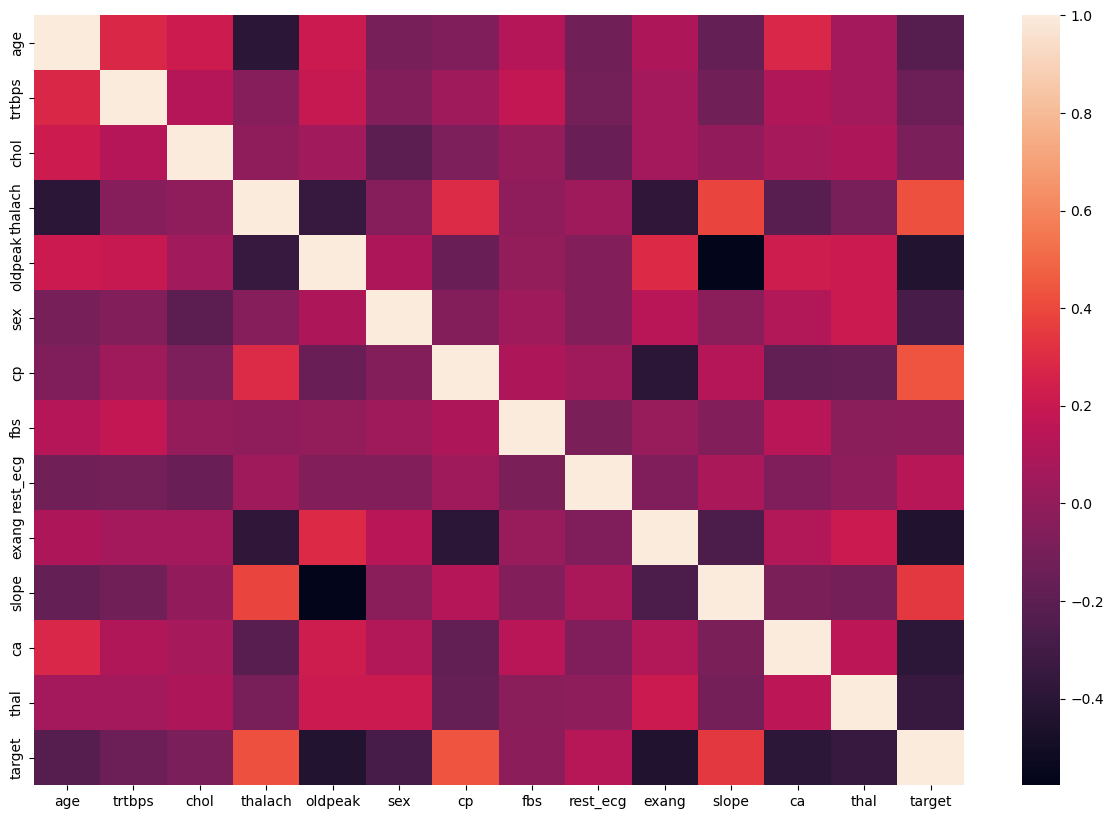

In [62]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df_new2.corr())

<Axes: >

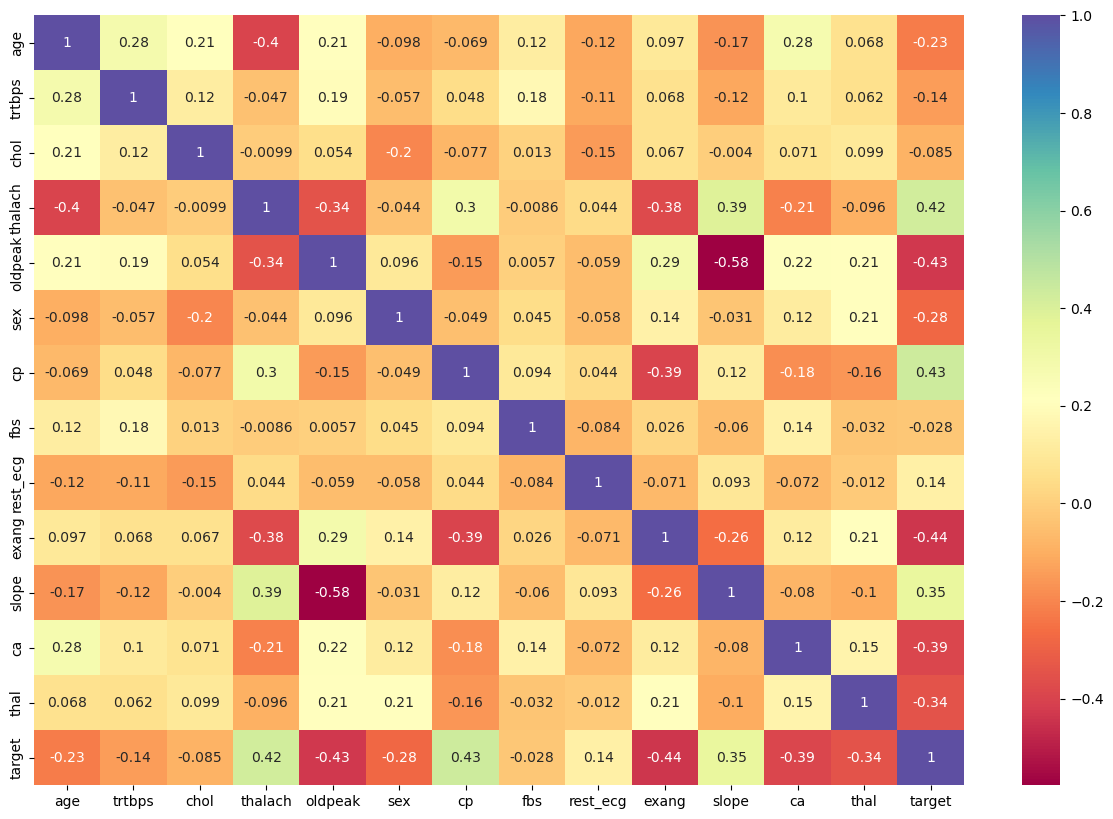

In [64]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df_new2.corr(),cmap="Spectral",annot = True)

<Axes: >

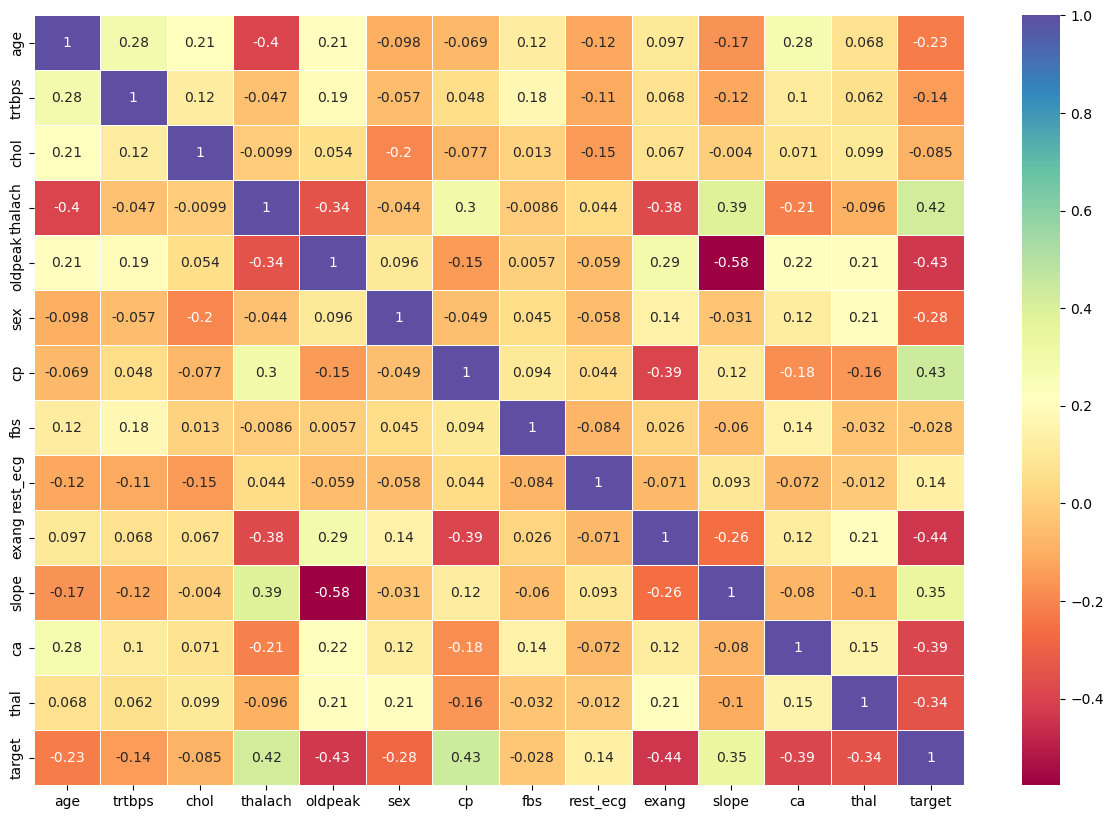

In [66]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df_new2.corr(),cmap="Spectral",annot = True, linewidths = 0.5)